<a href="https://colab.research.google.com/github/aiahsaniqbal/Spam-Detection-Multiple-Classifiers/blob/main/Assessment_by_Ahsan_Iqbal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
file_path = "/content/drive/MyDrive/Assessment/UpstartCommerce/hamandspam.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd



In [ ]:
import chardet
with open(file_path, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.7271340437464946, 'encoding': 'Windows-1252', 'language': ''}

In [ ]:

df = pd.read_csv(file_path,encoding='ISO-8859-1')

print(df.head()) 

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
len(df.index)

5572

In [ ]:
df.isnull().any(axis=1).sum()

0

In [ ]:
import string
legal_characters=r".,':;"+"\""+string.digits+string.ascii_letters
# legal_characters=list(legal_characters)

In [ ]:
df.nunique()
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
print(df[df.v2.str.contains(r'[#$%&()*+/<=>@[\]^{|}~]')].head())

      v1                                                 v2
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
7    ham  As per your request 'Melle Melle (Oru Minnamin...
11  spam  SIX chances to win CASH! From 100 to 20,000 po...
12  spam  URGENT! You have won a 1 week FREE membership ...
15  spam  XXXMobileMovieClub: To use your credit, click ...


In [ ]:
import unicodedata
import re
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

#
nltk.download('wordnet')
nltk.download('stopwords')
cached_stopwords = stopwords.words('english')
cached_stopwords.append('amp')

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words.split(' '):
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return ' '.join([str(letter) for letter in new_words])


def remove_nonlatin(words):
    words = ''.join([i if 48 <= ord(i) <= 122 else ' ' for i in words])
    try:
        words = (ch for ch in words if unicodedata.name(ch).startswith(('LATIN', 'DIGIT', 'SPACE')))
    except:
        print('Error in: ', words)
        return words

    return ''.join(words)



def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words.split(' '):
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return ' '.join([str(letter) for letter in new_words])


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words.split(' '):
        if word not in cached_stopwords:
            new_words.append(word)
    return ' '.join([str(letter) for letter in new_words])

def remove_tags(words):
    TAG_RE = re.compile(r'<[^>]+>')
    return TAG_RE.sub(' ', words)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def normalize(words):
    words = remove_tags(words)
    words = remove_nonlatin(words)
    words = remove_non_ascii(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    return words

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
for i in range(0, df.shape[0]):
   df['v2'][i]=normalize(str(df['v2'][i]))

In [ ]:
df.head()

,v1,v2
0,ham,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor U c already say
4,ham,Nah I think goes usf lives around though


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head()

,v1,v2
0,ham,Send ur birthdate month year I tel u ur LIFE P...
1,ham,Hi mate RV u hav nice hol message 3 say hello ...
2,ham,Don da whats plan
3,ham,Idk You keep saying since moved keep butting h...
4,ham,Oh baby house How come dont new pictures facebook


In [ ]:
df['v3']=df.apply(lambda row: len(row.v2), axis=1)

In [ ]:
df.head()

,v1,v2,v3
0,ham,Send ur birthdate month year I tel u ur LIFE P...,89
1,ham,Hi mate RV u hav nice hol message 3 say hello ...,94
2,ham,Don da whats plan,17
3,ham,Idk You keep saying since moved keep butting h...,138
4,ham,Oh baby house How come dont new pictures facebook,49


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8e6bd6e50>],
      dtype=object)

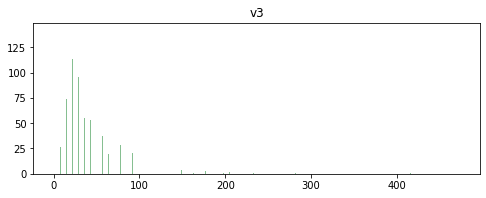

In [ ]:

df.hist(column='v3', bins=len(df.index), grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

# Splitting and Vectorization Tfidf applied

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer() 
X=vectorizer.fit_transform(df.v2)
Y=df.v1

In [ ]:

train_ratio = 0.70
test_ratio = 0.10
validation_ratio = 0.20

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_ratio)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=validation_ratio/(train_ratio+test_ratio))

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(3760, 8675)
(558, 8675)
(1254, 8675)


# **SVM**
Classifying data using SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
svm_model=classifier.fit(X_train, y_train)
print(svm_model.score(X_test,y_test))

0.9695340501792115


# Logistic Regression

Classifying data using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
lr_model=scikit_log_reg.fit(X_train,y_train)
print(lr_model.score(X_test,y_test))

[LibLinear]0.9713261648745519


# Decision Tree

Classifying data using Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
scikit_Desc_Tr=DecisionTreeClassifier(min_samples_split=7, random_state=111)
dt_model=scikit_Desc_Tr.fit(X_train,y_train)
print(dt_model.score(X_test,y_test))

0.9623655913978495


# Multinomial Naïve Bayes

Classifying data using Multinomial Naïve Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
scikit_Multi_NB=MultinomialNB(alpha=0.2)
mnb_model=scikit_Multi_NB.fit(X_train,y_train)
print(mnb_model.score(X_test,y_test))

0.9838709677419355


# Results of the above classifiers

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
def confusion_matrix_models(model,model_name):
  print('\n***************** Results with Confusion Matrix for ',model_name,'*****************\n')
  labels = ['ham', 'spam']
  y_pred = model.predict(X_test)
  y_true = y_test
  cm = confusion_matrix(y_true, y_pred,labels=labels)
  f, ax = plt.subplots(figsize =(5,5))
  sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
  plt.xlabel("y_pred")
  plt.ylabel("y_true")
  plt.show()
  print('*-Spam Results')
  print('Recall: %.3f' % recall_score(y_test, y_pred,average="binary", pos_label="spam"))
  print('Precision: %.3f' % precision_score(y_test, y_pred,average="binary", pos_label="spam"))
  print('F1 Score: %.3f' % f1_score(y_test, y_pred,average="binary", pos_label="spam"))
  print('*-Ham Results')
  print('Recall: %.3f' % recall_score(y_test, y_pred,average="binary", pos_label="ham"))
  print('Precision: %.3f' % precision_score(y_test, y_pred,average="binary", pos_label="ham"))
  print('F1 Score: %.3f' % f1_score(y_test, y_pred,average="binary", pos_label="ham"))
  print('[---Accuracy: %.3f---]' % accuracy_score(y_test, y_pred))


***************** Results with Confusion Matrix for  Multinomial Naïve Bayes *****************



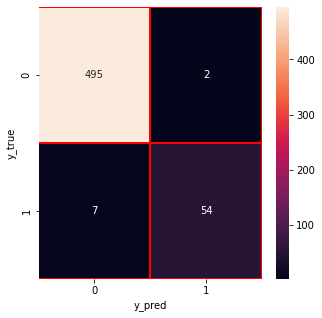

*-Spam Results
Recall: 0.885
Precision: 0.964
F1 Score: 0.923
*-Ham Results
Recall: 0.996
Precision: 0.986
F1 Score: 0.991
[---Accuracy: 0.984---]

***************** Results with Confusion Matrix for  Decision Tree *****************



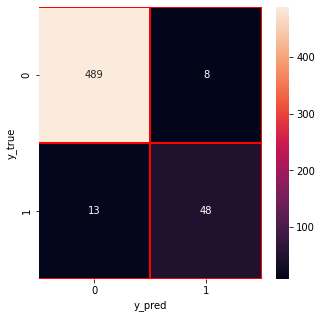

*-Spam Results
Recall: 0.787
Precision: 0.857
F1 Score: 0.821
*-Ham Results
Recall: 0.984
Precision: 0.974
F1 Score: 0.979
[---Accuracy: 0.962---]

***************** Results with Confusion Matrix for  Logistic Regression *****************



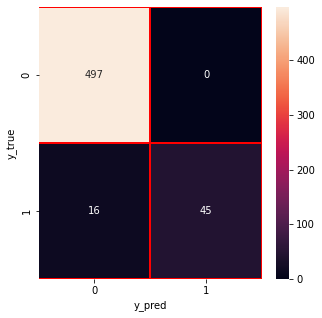

*-Spam Results
Recall: 0.738
Precision: 1.000
F1 Score: 0.849
*-Ham Results
Recall: 1.000
Precision: 0.969
F1 Score: 0.984
[---Accuracy: 0.971---]

***************** Results with Confusion Matrix for  SVM *****************



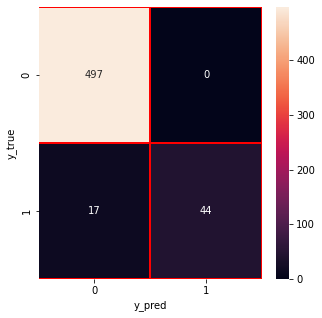

*-Spam Results
Recall: 0.721
Precision: 1.000
F1 Score: 0.838
*-Ham Results
Recall: 1.000
Precision: 0.967
F1 Score: 0.983
[---Accuracy: 0.970---]


In [ ]:
confusion_matrix_models(mnb_model, 'Multinomial Naïve Bayes')
confusion_matrix_models(dt_model, 'Decision Tree')
confusion_matrix_models(lr_model, 'Logistic Regression')
confusion_matrix_models(svm_model, 'SVM')

# Classifies least number of spam messages as ham
In results we can see that SVM and Logistic regression produces the results where we have 0 instance of spam missclassified as ham. 

# Further improve upon the accuracy of this problem


*   We can add more data and features to imporve the accuracy of our classifier, considering the that spam msgs usually contains more text.
*   We can also use some neural network model, like RNN for this classification problem.



